# RED WINE QUALITY PREDICTION

# Problem statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings

warnings.filterwarnings("ignore")

In [2]:
#Loading data set 
import pandas as pd
import requests
import io
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df #dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe() #describes various parameters of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# EDA

# Univarient Analysis

In [6]:
df['quality'].value_counts() # count of individual value

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

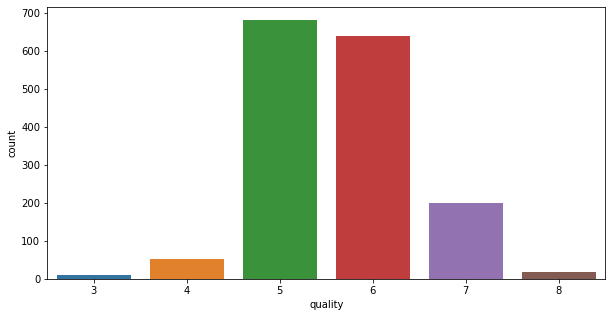

In [7]:
#Visulaization of target variable using count plot
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x='quality', data= df, order=[3,4,5,6,7,8])

Renaming columns to removes spaces in columns

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',},inplace = True)

In [10]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Checking value count for each column

In [11]:
for i in df.columns:
    print('column Name  :',i)
    print(df[i].value_counts())

column Name  : fixed_acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.4     1
14.0     1
5.5      1
4.6      1
4.7      1
Name: fixed_acidity, Length: 96, dtype: int64
column Name  : volatile_acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.090     1
1.035     1
1.580     1
0.950     1
0.805     1
Name: volatile_acidity, Length: 143, dtype: int64
column Name  : citric_acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.75      1
0.78      1
1.00      1
0.62      1
0.72      1
Name: citric_acid, Length: 80, dtype: int64
column Name  : residual_sugar
2.00    156
2.20    131
1.80    129
2.10    128
1.90    117
       ... 
5.70      1
2.85      1
7.30      1
8.90      1
2.65      1
Name: residual_sugar, Length: 91, dtype: int64
column Name  : chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.137     1
0.267     1
0.043     1
0.186     1
0.125     1
Name: chlorides, Leng

Plotting histogram for each column

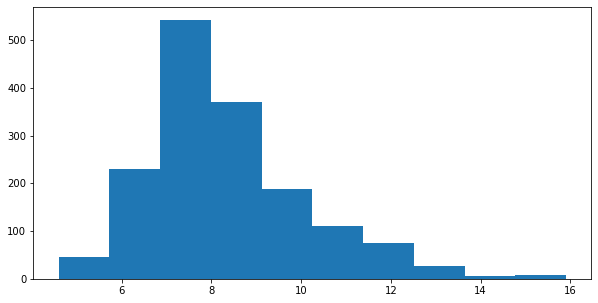

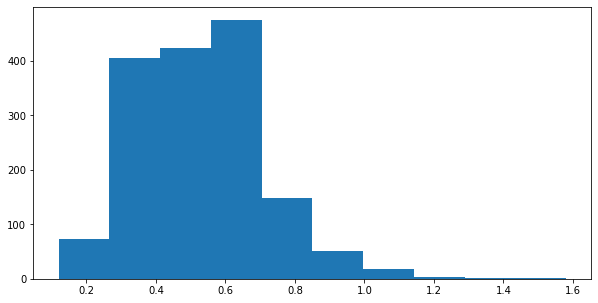

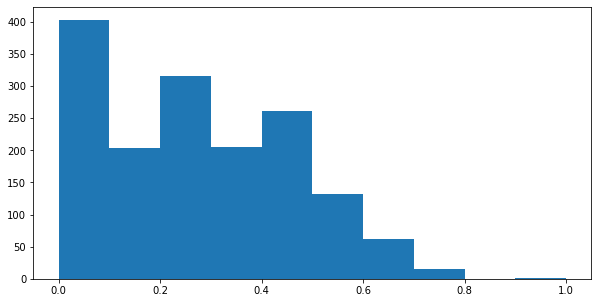

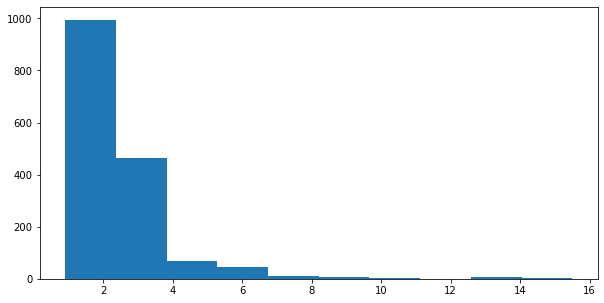

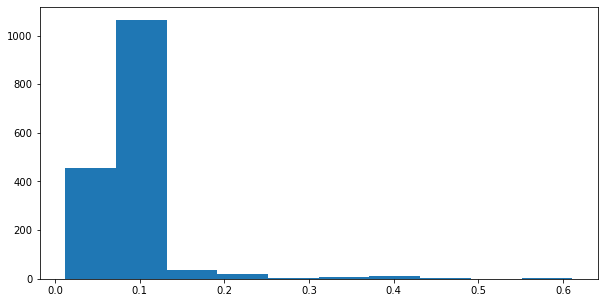

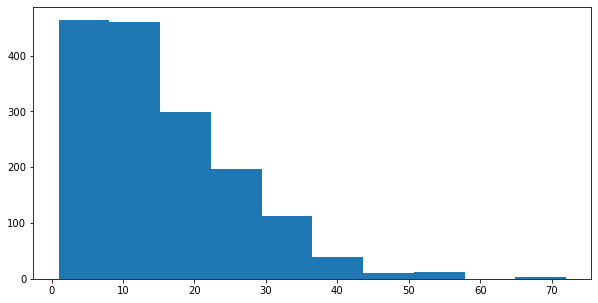

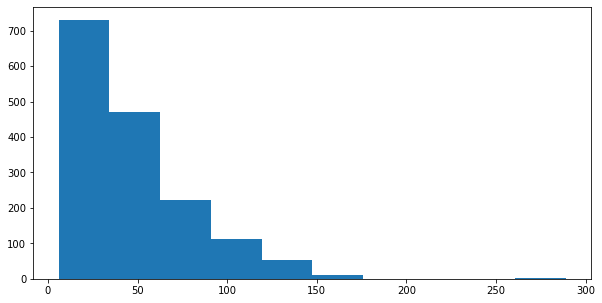

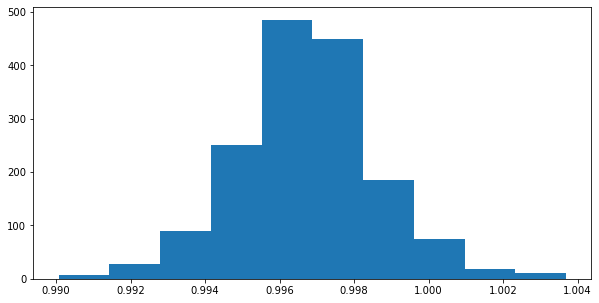

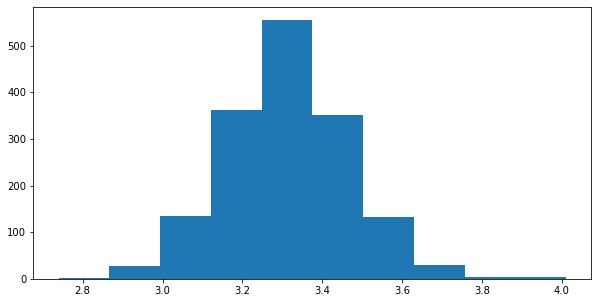

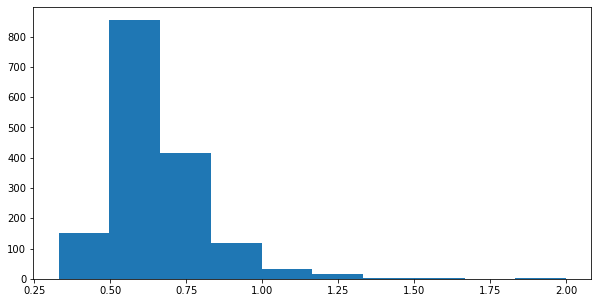

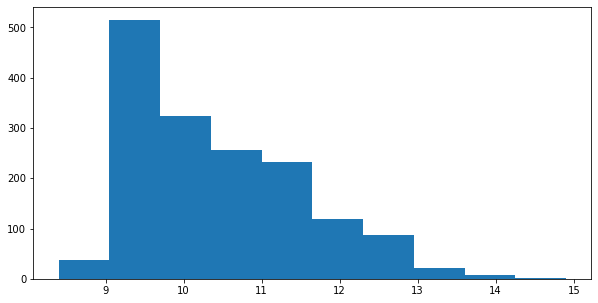

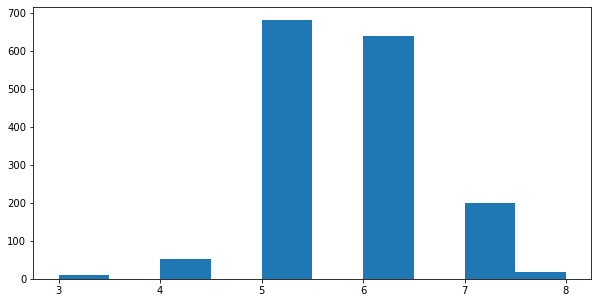

In [12]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df[i]);


Checking for null values

In [13]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Visualization of null values using heatmap

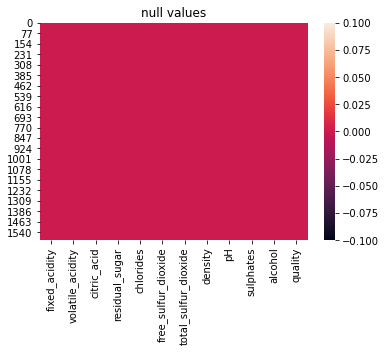

In [14]:
import seaborn as sns
sns.heatmap(df.isnull())
plt.title('null values')
plt.show()

# Multi variant analysis

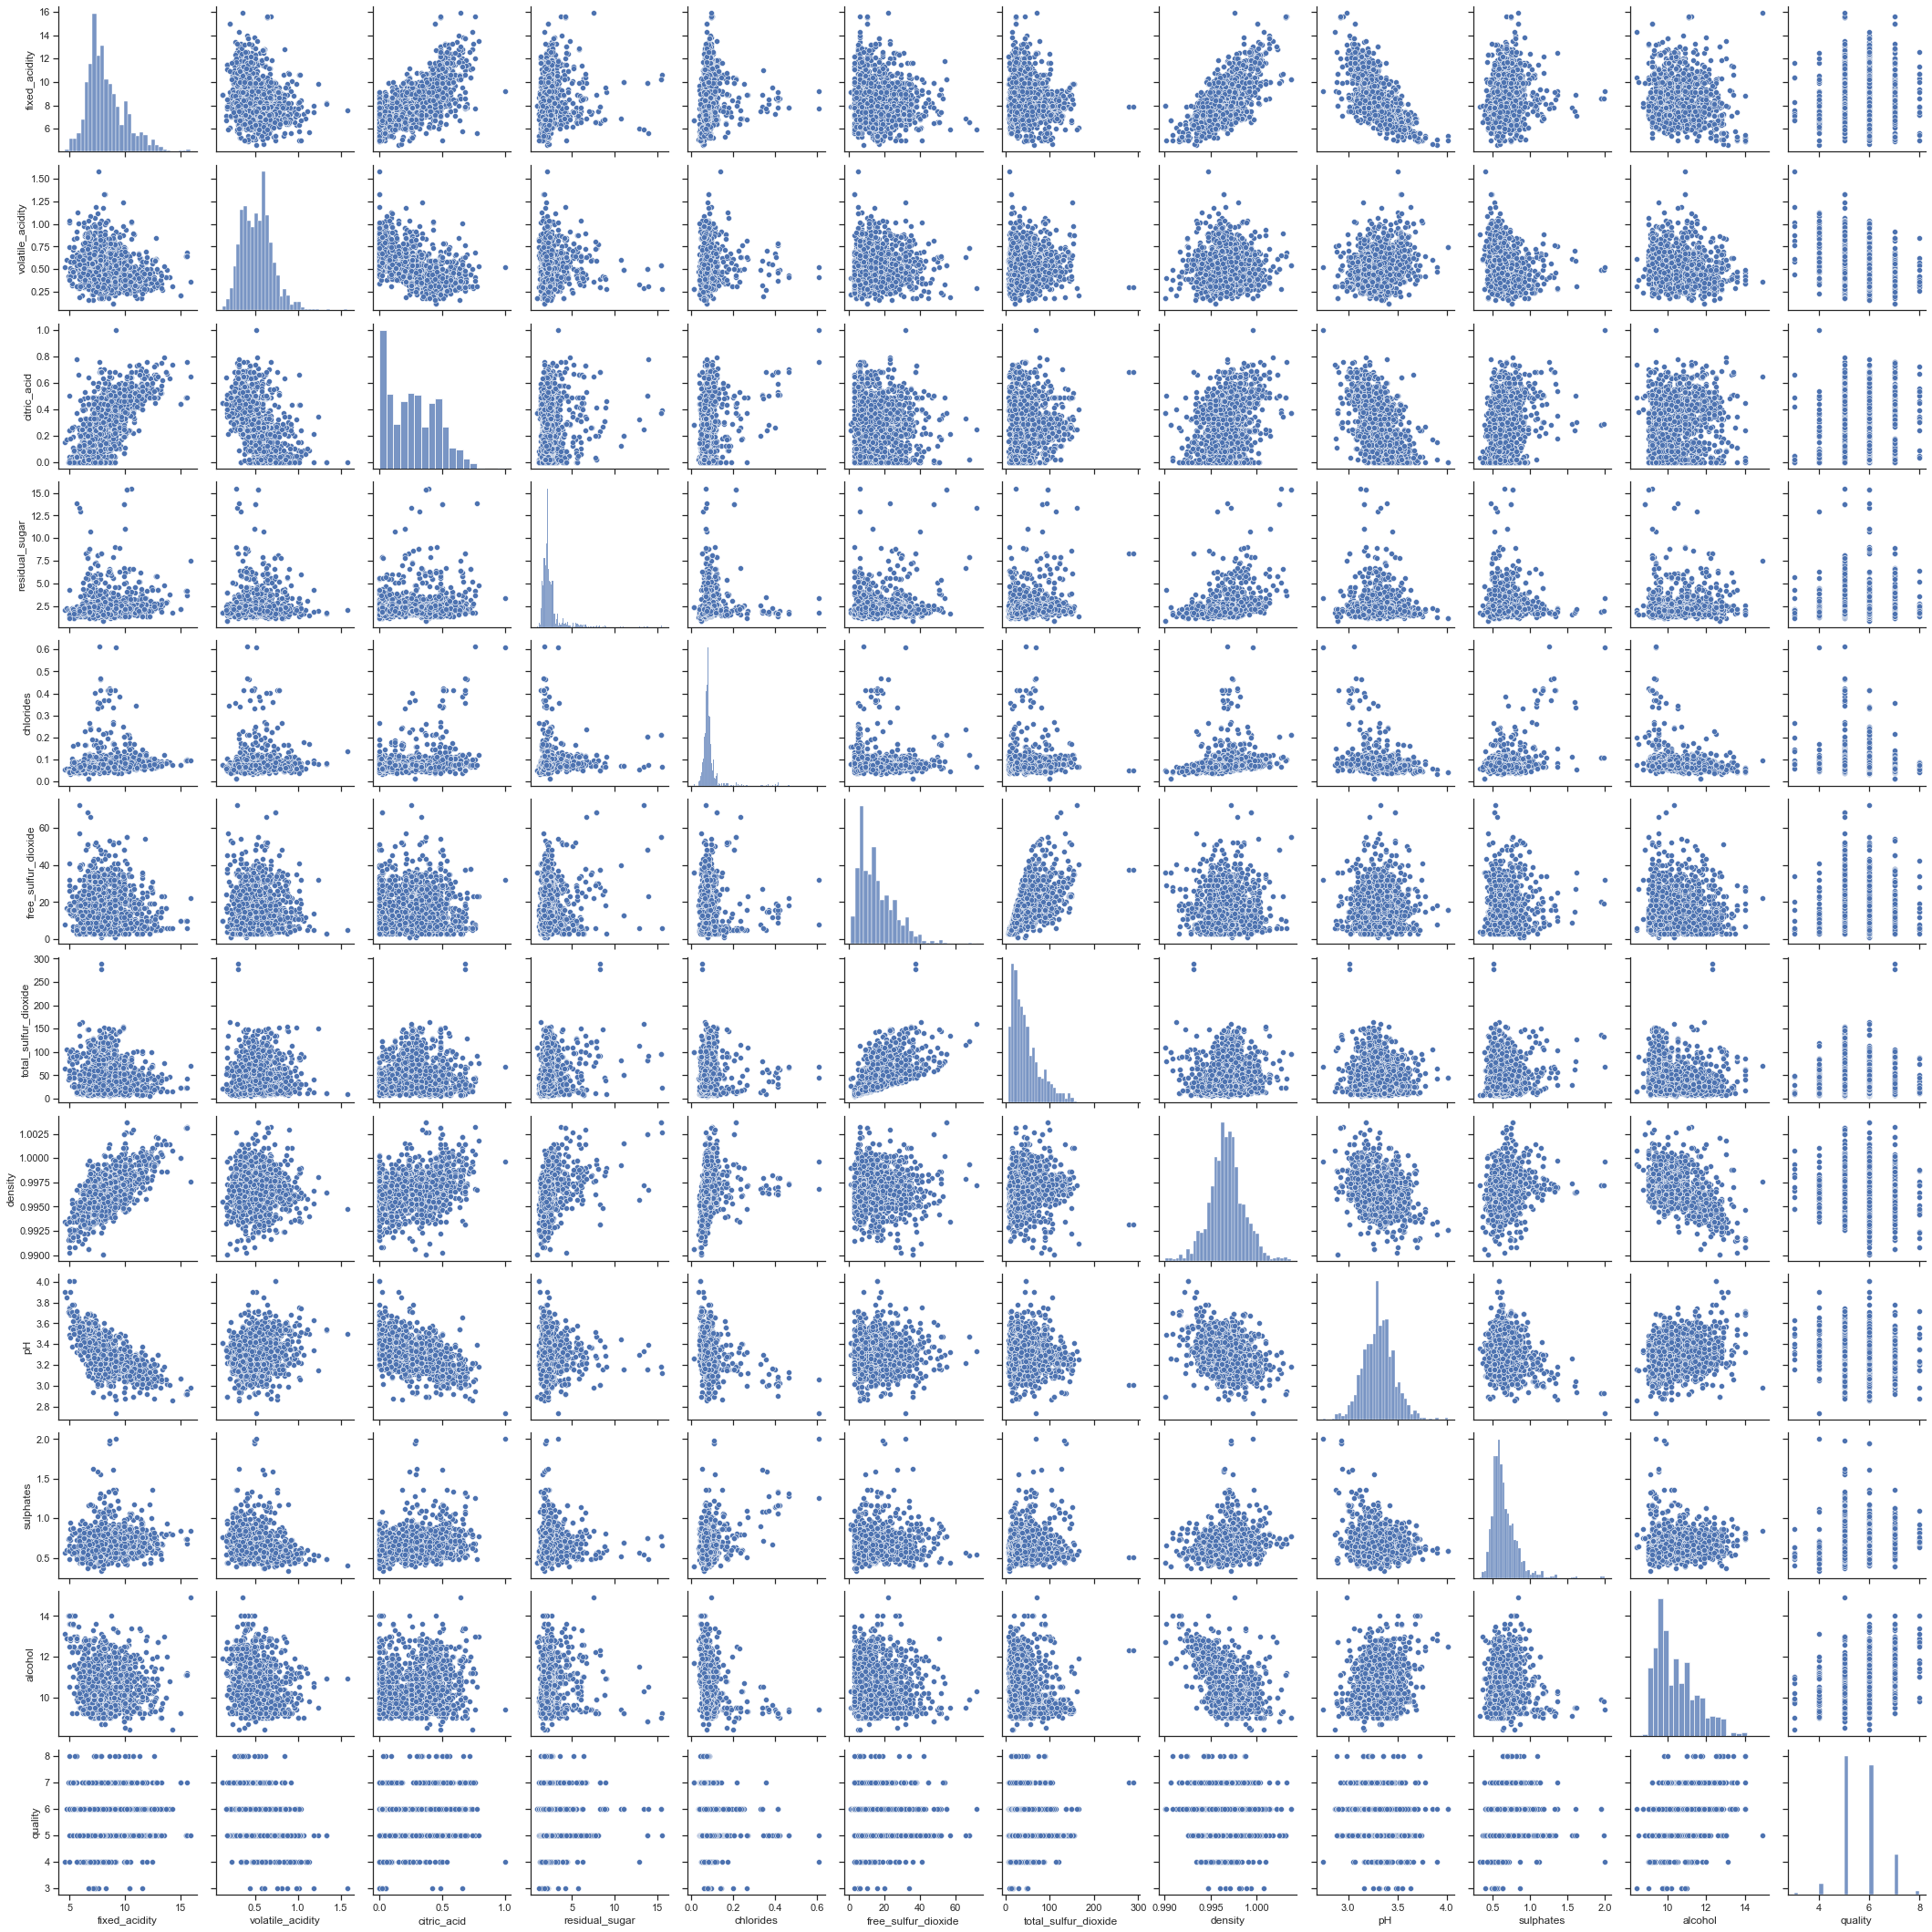

In [15]:
sns.set(style='ticks', color_codes = True, font='sans-serif')
df_pairplot=sns.pairplot(df)

Finding correlation between all columns

In [16]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


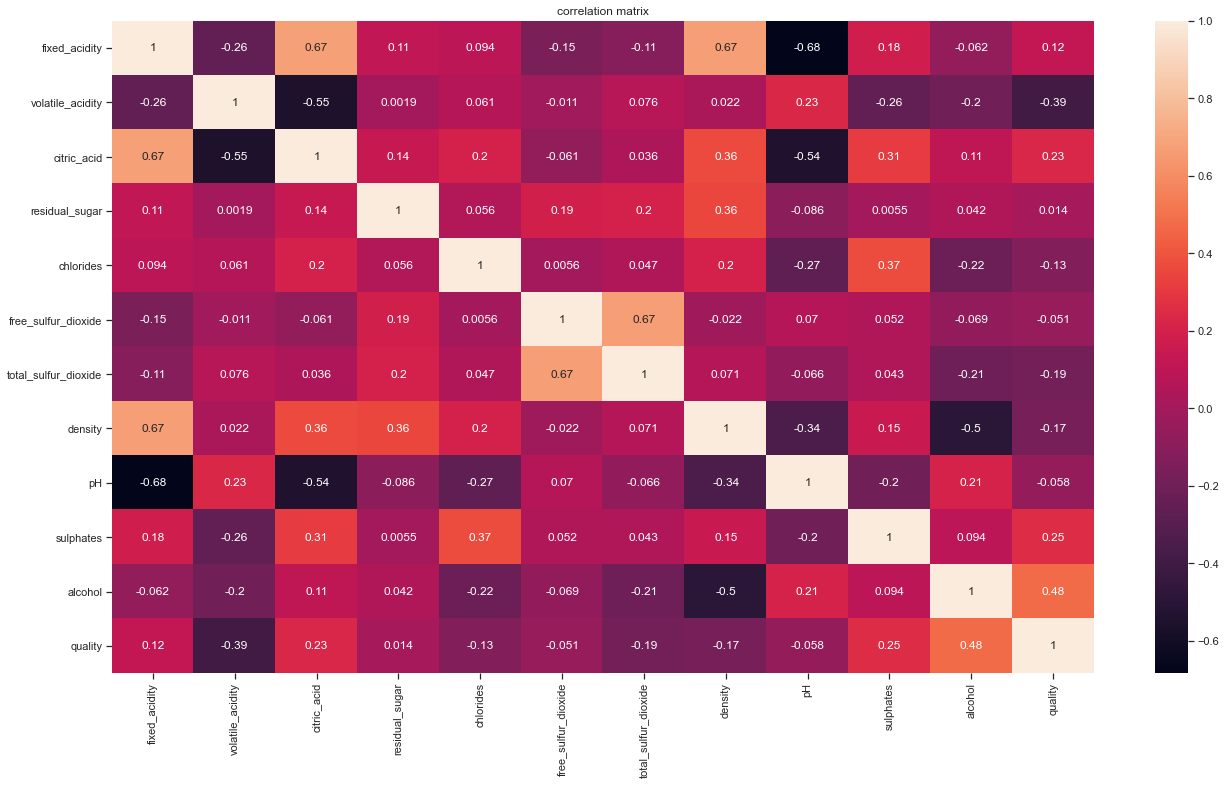

In [18]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None)
import seaborn as sns
corr_mat = df.corr()
plt.figure(figsize = [22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation matrix")
plt.show()

By looking heatmap we can say that alcohol is more correlated with quality followed by volatile acidity

setting an arbitrary cutoff for dependent variable (wine quality) 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [19]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [20]:
df['quality'] = ['good' if x>=7 else 'bad' for x in df['quality']]
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [21]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

Label encoding the quality column to convert string to int

In [22]:
df['quality'] = le.fit_transform(df['quality'])

In [23]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [24]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Checking skewness

In [25]:
df.skew()

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [26]:
x= df.drop('quality', axis=1)
y=df['quality']
#df_new = x

In [27]:
from sklearn.preprocessing import power_transform
df_new= power_transform(x) #using power transform to remove skewness
df_new= pd.DataFrame(df_new,columns=x.columns)

In [28]:
df_new.skew()

fixed_acidity           0.002529
volatile_acidity        0.003099
citric_acid             0.017788
residual_sugar         -0.015715
chlorides              -0.151304
free_sulfur_dioxide    -0.009948
total_sulfur_dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

In [29]:
df_new 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


Checking for outliers using subplots

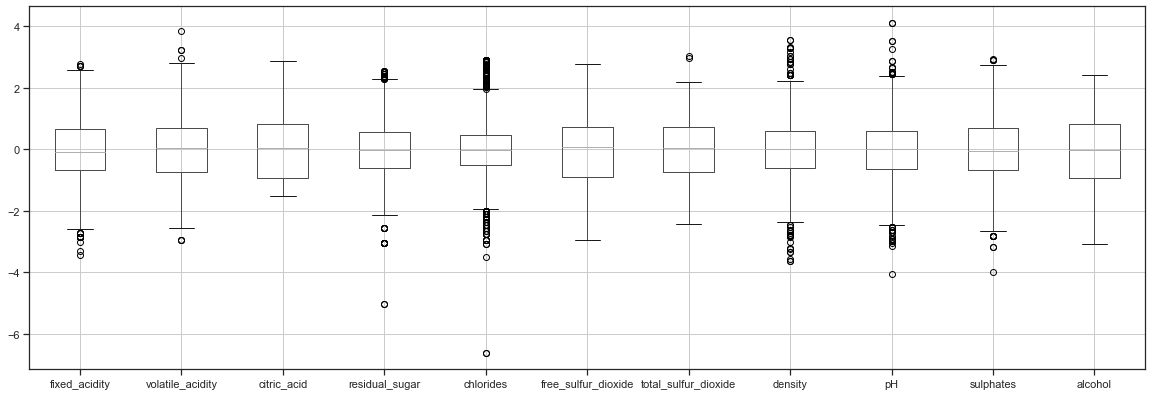

In [30]:
df_new.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

In [31]:
df_new

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


Function to replace outliers with median

In [32]:
def outliers(df_new):
    
    for i in df_new.describe().columns:
        Q1=df_new.describe().at['25%',i]
        Q3=df_new.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df_new[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df_new[i].median())
            else:
                p.append(j)
        df_new[i]=p
    return df_new

In [33]:
outliers(df_new)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800


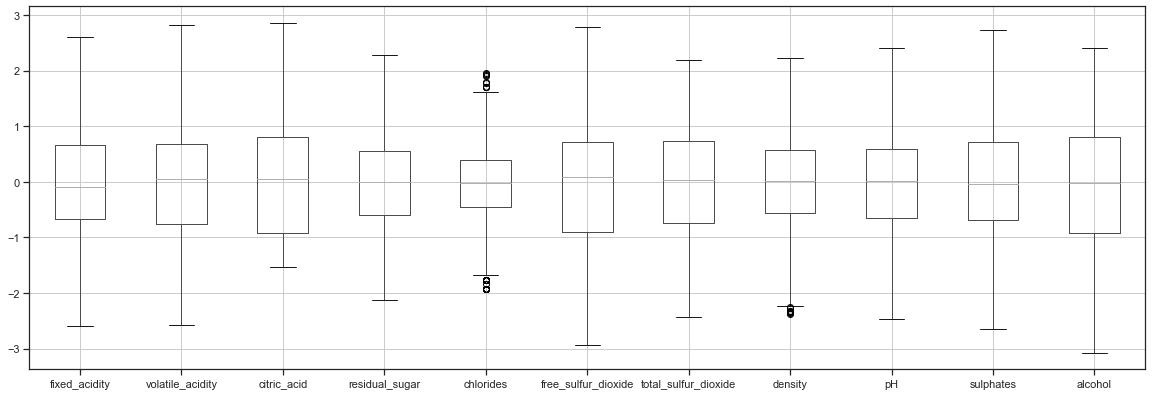

In [34]:
df_new.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom= 0.25)
plt.show()

In [35]:
#x= df_new

In [36]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Checking best random state

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
Max_acc = 0
Max_rs = 0
y=df['quality']
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predir = LR.predict(x_test)
    acc_score = accuracy_score(y_test, predir)
    if acc_score> Max_acc:
        Max_acc = acc_score
        Max_rs = i
print("best acc is", Max_acc, "on random state", Max_rs) 

best acc is 0.9104166666666667 on random state 38


Train Test for decision tree since scaling is not required for decision tree it is not executing in the for loop

In [38]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=38)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8895833333333333
[[397  30]
 [ 23  30]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       427
           1       0.50      0.57      0.53        53

    accuracy                           0.89       480
   macro avg       0.72      0.75      0.73       480
weighted avg       0.90      0.89      0.89       480



In [39]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, x, y, cv=5)
print("cross validation score of Decision Tree model : ", scr.mean())

cross validation score of Decision Tree model :  0.8098726489028213


Scaling of data

In [40]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
x = trans.fit_transform(x)

In [41]:
x

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=38)

In [43]:
# Train test split for Algorithms
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    model.fit(x_train, y_train)
    preddt = model.predict(x_test)
    print("Confusion Matrix --------> ",name,"------>",accuracy_score(y_test, preddt))
    print(confusion_matrix(y_test, preddt),name)
    print(classification_report(y_test, preddt),name)
    names.append(name)
    
# boxplot algorithm comparison
#fig = pyplot.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
#pyplot.boxplot(results)
#ax.set_xticklabels(names)
#pyplot.show()

Confusion Matrix -------->  LR ------> 0.9104166666666667
[[422   5]
 [ 38  15]] LR
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       427
           1       0.75      0.28      0.41        53

    accuracy                           0.91       480
   macro avg       0.83      0.64      0.68       480
weighted avg       0.90      0.91      0.89       480
 LR
Confusion Matrix -------->  KNN ------> 0.8875
[[399  28]
 [ 26  27]] KNN
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       427
           1       0.49      0.51      0.50        53

    accuracy                           0.89       480
   macro avg       0.71      0.72      0.72       480
weighted avg       0.89      0.89      0.89       480
 KNN
Confusion Matrix -------->  NB ------> 0.8604166666666667
[[373  54]
 [ 13  40]] NB
              precision    recall  f1-score   support

           0       0.97      0.87      0.9

LR 0.873062106918239 0.07324092586602757
KNN 0.8574174528301887 0.06653066221672861
CART 0.8298977987421384 0.06389785588739307
NB 0.8386713836477988 0.08352944653978565
SVM 0.871816037735849 0.0721183455042957


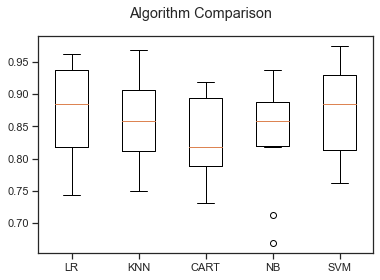

In [44]:
# Compare Algorithms
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

# Already loaded earlier
#array = data.values
#X = array[:,0:8]
#Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# AUC_ROC curve

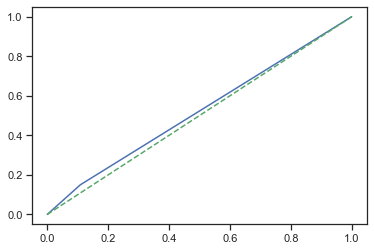

In [45]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score        
fpr, tpr, thresholds = roc_curve(predir,y_test)  
roc_auc=auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr,roc_auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.show()

In [46]:
#### Hyper parameter tuning


In [47]:
df.shape

(1599, 12)

In [48]:
Y=df['quality']

In [49]:
Y.shape

(1599,)

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=32)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x,Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.878885 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.878882 (0.018816) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.878882 (0.018816) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.878882 (0.018816) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.878675 (0.020667) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.878675 (0.020667) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.878885 (0.019614) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.877006 (0.014916) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.877006 (0.014916) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.875756 (0.014587) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.863666 (0.002905) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863666 (0.002905) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.864292 (0.002746) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.864292 (0.002746) with

# Model saving

In [51]:
import pickle 
filename = "wine_quality-red.pkl"
pickle.dump(LR,open(filename,'wb'))

Conclusion

In [53]:
a=np.array(y_test)
predicted=np.array(LR.predict(x_test))
df_conclusion=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_conclusion

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
475,0,0
476,0,0
477,0,0
478,0,0
